# Objective:
To classify incoming customers into groups based on their reviews/feedback, which will help us understand if they are Promoters, Detractors or Passives.

Data Manipulation:

We orginally had the customer review and their corresponding Overall rating. We assumed the overall rating to be their NPS Score and used this to classify the customers into three groups namely; "Promoters", "Detractors" and "Passives. 
* Promoters are the customers who have rated us the highest (8,9 or 10). They are our best and most loyal customers and they will market our product in their peer group.
* Passives are the customers who have rated us moderately(5,6 or 7). These are customers who lie on the fence, they will neither actively promote our product nor critize us or our products in their peer group.
* Detractors are the customers who have rates us the lowest(1,2,3 or 4). They are customers who are dissatisfied with our products/services and will encourage other customers to move away from our producsts as well.

# Importing the dataset

In [ ]:
import pandas as pd
df=pd.read_csv('/content/Customer Reviews_NPS Score.csv', sep=',')
df

,customer_review,NPS Score
0,London to Izmir via Istanbul. First time I'd ...,Passive
1,Istanbul to Bucharest. We make our check in i...,Detractor
2,Rome to Prishtina via Istanbul. I flew with t...,Detractor
3,Flew on Turkish Airlines IAD-IST-KHI and retu...,Promoter
4,Mumbai to Dublin via Istanbul. Never book Tur...,Detractor
...,...,...
64012,London to Kiev Simferopol London. Overall a pr...,Detractor
64013,Brussels-Kiev-Brussels Business Class: no dela...,Detractor
64014,SPL-KBP vv operated in code share with KLM don...,Detractor
64015,Kiev-Vienna. Check in was slow but after that ...,Detractor


We have a total of 64017 reviews from our customers and their corresponding category.

In [ ]:
df.head()

,customer_review,NPS Score
0,London to Izmir via Istanbul. First time I'd ...,Passive
1,Istanbul to Bucharest. We make our check in i...,Detractor
2,Rome to Prishtina via Istanbul. I flew with t...,Detractor
3,Flew on Turkish Airlines IAD-IST-KHI and retu...,Promoter
4,Mumbai to Dublin via Istanbul. Never book Tur...,Detractor


In [ ]:
df.tail()

,customer_review,NPS Score
64012,London to Kiev Simferopol London. Overall a pr...,Detractor
64013,Brussels-Kiev-Brussels Business Class: no dela...,Detractor
64014,SPL-KBP vv operated in code share with KLM don...,Detractor
64015,Kiev-Vienna. Check in was slow but after that ...,Detractor
64016,VIE-ODS Business class. B737-500 either leased...,Detractor


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64017 entries, 0 to 64016
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_review  64017 non-null  object
 1   NPS Score        64017 non-null  object
dtypes: object(2)
memory usage: 1000.4+ KB


In [ ]:
df.describe()

,customer_review,NPS Score
count,64017,64017
unique,59391,3
top,On March 2/14 a friend and I were booked on an...,Detractor
freq,6,30016


In [ ]:
df['NPS Score'].value_counts()

Detractor    30016
Promoter     23589
Passive      10412
Name: NPS Score, dtype: int64

Maximum number of customers are 'Detractors' i.e., they are dissatisfied with our airline and service experience. 

# Word Cloud 

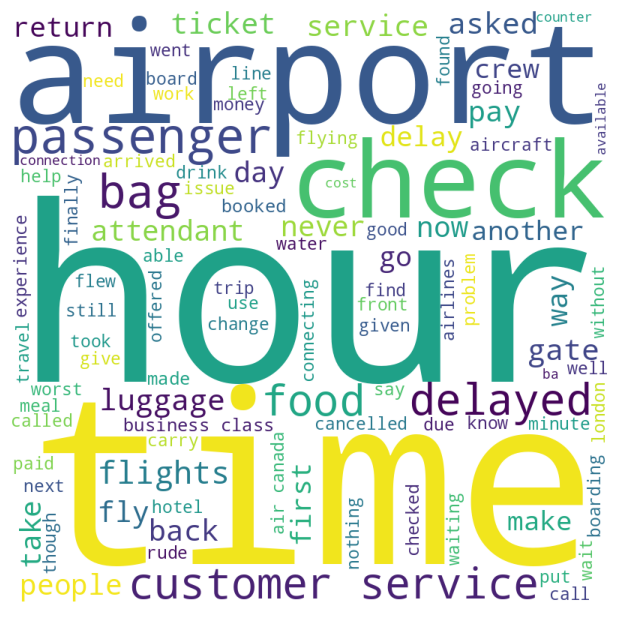

In [ ]:
## DETRACTOR

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

df1=df[df['NPS Score']=='Detractor']

comment_words = ''
stopwords = set(STOPWORDS)
stopwords.update(['flight','plane','one','u','us','airline',"told","even",'will','said','got','seat','staff','seats'])

# iterate through the reviews
for val in df1["customer_review"]:
	val = str(val)
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10,
				max_words=100).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

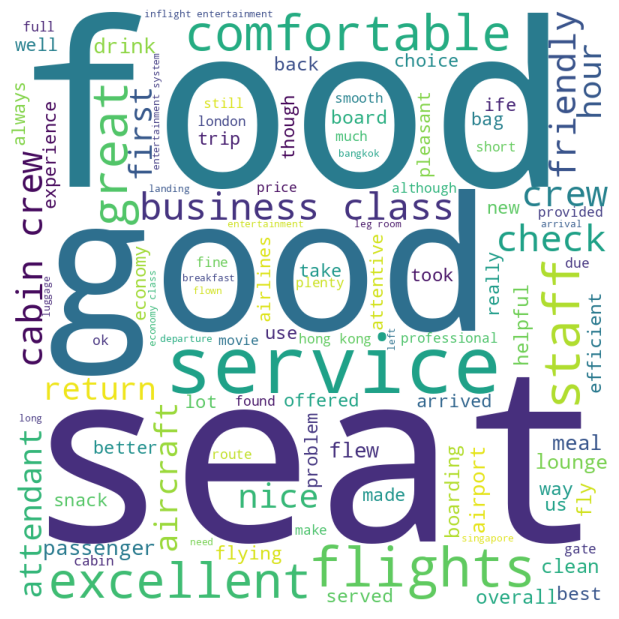

In [ ]:
### PROMOTER

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

df1=df[df['NPS Score']=='Promoter']

comment_words = ''
stopwords = set(STOPWORDS)
stopwords.update(['flight','plane','one','u','airline',"told","even",'will','said','got', 'time'])

# iterate through the csv file
for val in df1["customer_review"]:
	val = str(val)
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10,
				max_words=100).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


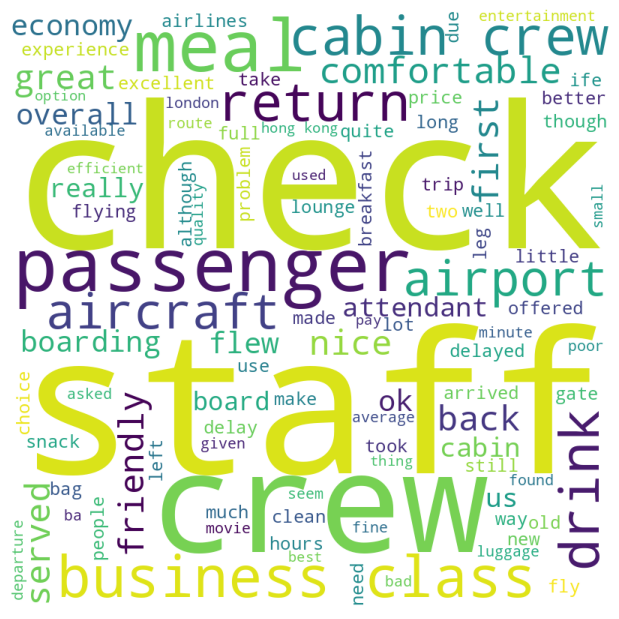

In [ ]:
#### PASSIVES

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

df1=df[df['NPS Score']=='Passive']

comment_words = ''
stopwords = set(STOPWORDS)
stopwords.update(['flight','plane','one','u','airline',"told","even",'will','said','got','time', 'seats','good','flights','service','food', 'seat','hour'])

# iterate through the csv file
for val in df1["customer_review"]:
	val = str(val)
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10,
				max_words=100).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


# Lemmatization 
Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item.

In [ ]:
import nltk   
nltk.download('stopwords')  
nltk.download('wordnet')    
nltk.download('punkt')  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#LEMMATIZATION
import re #regular expression.
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  

lemmatizer = WordNetLemmatizer()          # calling the lemmatizer

def lemantize(sentence):
  review = re.sub('[^a-zA-Z]', ' ', sentence) 
  #in sentence if it finds anything other that alphabets (caps or lower case) then replace with with ' '(space)
  
  review = re.sub('\d+', ' ', review) # remove digits
  review = review.lower() # convert all text to lowercase
  review = review.split() # tokenisation
  review_lem = [lemmatizer.lemmatize(word) for word in review if word not in stopwords.words('english')]
  #using a lemmatizer we tell that if any word is found to be in the stopwords, then just remove it from the sentence

  review_lem = ' '.join(review_lem) # join the text into the sentence
  corpus_lem.append(review_lem)     # appends the values to the list

In [ ]:
corpus_lem = [] #emptylist
df['customer_review'].apply(lemantize);

In [ ]:
df.head()

# Stemming the reviews
Stemming is a natural language processing technique that lowers inflection in words to their root forms

In [ ]:
#STEMMING
import re 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer  

stemmer = PorterStemmer()           # calling the stemmer

def stemmering(sentence):
  review = re.sub('[^a-zA-Z]', ' ', sentence) 
  #in sentence if it finds anything other that alphabets (caps or lower case) then replace with with ' '(space)
  review = re.sub('\d+', ' ', review) # remove digits
  review = review.lower() # convert all text to lowercase
  review = review.split() # tokenisation
  review_stem = [stemmer.stem(word) for word in review if word not in stopwords.words('english')]
  #using a stemmer we tell that if any word is found to be in the stopwords, then just remove it from the sentence

  review_stem = ' '.join(review_stem) # join the text into the sentence
  corpus_stem.append(review_stem)     # appends the values to the list

In [ ]:
corpus_stem = [] #empty list
df['customer_review'].apply(stemmering);

In [ ]:
x=df['customer_review'].values
y=df['NPS Score'].values 

In [ ]:
y

array(['Passive', 'Detractor', 'Detractor', ..., 'Detractor', 'Detractor',
       'Detractor'], dtype=object)

# Splitting dataset into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [ ]:
x_train.shape # 75%

(48012,)

In [ ]:
x_test.shape #25%

(16005,)

## Data Modelling 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words='english')

x_train_vect=vect.fit_transform(x_train)
x_test_vect=vect.transform(x_test)
#document term matrix
x_test_vect

<16005x41606 sparse matrix of type '<class 'numpy.int64'>'
	with 835766 stored elements in Compressed Sparse Row format>

## Naive Bayes Model 

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model_nb = MultinomialNB()
model_nb.fit(x_train_vect, y_train)

y_pred_nb= model_nb.predict(x_test_vect)
y_pred_nb

from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_pred_nb,y_test)

print(classification_report(y_pred_nb,y_test))

              precision    recall  f1-score   support

   Detractor       0.81      0.86      0.83      7072
     Passive       0.43      0.41      0.42      2753
    Promoter       0.84      0.80      0.82      6180

    accuracy                           0.76     16005
   macro avg       0.69      0.69      0.69     16005
weighted avg       0.76      0.76      0.76     16005



## Support Vector Machines SVM

#### SVM using Linear Kernel

In [ ]:
from sklearn.svm import LinearSVC
model_lsvm = LinearSVC() # linear kernel
model_lsvm.fit(x_train_vect,y_train)

y_pred_lsvm=model_lsvm.predict(x_test_vect)
y_pred_lsvm

from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_pred_lsvm,y_test)

print(classification_report(y_pred_lsvm,y_test))

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

   Detractor       0.88      0.87      0.87      7583
     Passive       0.39      0.45      0.42      2270
    Promoter       0.84      0.80      0.82      6152

    accuracy                           0.78     16005
   macro avg       0.70      0.71      0.70     16005
weighted avg       0.79      0.78      0.79     16005



#### SVM using RBF kernel

In [ ]:
# support vector classifier
from sklearn.svm import SVC  
model_rbf=SVC() #using the RBF kernel
model_rbf.fit(x_train_vect,y_train)

y_pred_rbf=model_rbf.predict(x_test_vect)
y_pred_rbf

from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_pred_rbf,y_test)

print(classification_report(y_pred_rbf,y_test))

              precision    recall  f1-score   support

   Detractor       0.95      0.85      0.90      8318
     Passive       0.30      0.63      0.41      1283
    Promoter       0.89      0.82      0.85      6404

    accuracy                           0.82     16005
   macro avg       0.71      0.77      0.72     16005
weighted avg       0.87      0.82      0.84     16005



#### SVM using Polynomial Kernel

In [ ]:
# support vector classifier
from sklearn.svm import SVC  
model_psvm=SVC(kernel ='poly', degree = 3) # using the polynomial kernel
model_psvm.fit(x_train_vect,y_train)

y_pred_psvm=model_psvm.predict(x_test_vect)
y_pred_psvm

from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_pred_psvm,y_test)

print(classification_report(y_pred_psvm,y_test))

              precision    recall  f1-score   support

   Detractor       0.87      0.86      0.87      7531
     Passive       0.16      0.51      0.24       820
    Promoter       0.91      0.70      0.79      7654

    accuracy                           0.77     16005
   macro avg       0.65      0.69      0.63     16005
weighted avg       0.85      0.77      0.80     16005



In [ ]:
accuracy_score(y_pred_psvm,y_test)

0.7670103092783506

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 500,criterion='gini', oob_score=True)
model_rf.fit(x_train_vect,y_train)

y_pred_rf=model_rf.predict(x_test_vect)
y_pred_rf

from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_pred_rf,y_test)

print(classification_report(y_pred_rf,y_test))

              precision    recall  f1-score   support

   Detractor       0.95      0.83      0.89      8509
     Passive       0.12      1.00      0.22       324
    Promoter       0.91      0.74      0.82      7172

    accuracy                           0.79     16005
   macro avg       0.66      0.86      0.64     16005
weighted avg       0.91      0.79      0.84     16005



#### To verify results:

* Taking random reviews from our test data set and checking whether our best model is able to correctly classifying them.

In [ ]:
test_sentence=df['customer_review'][1096]
test_sentence

"I flew Comfort Class from IST to JFK. I've always been impressed with the service on economy class Turkish Airlines so I spent the upgrade for Comfort. I'd compare the legroom and quality of service to domestic American Airlines Business Class. It's nearly business class levels of comfort for about 20% more than economy would've cost me. The food was excellent I appreciate being given choices for my meals and drinks as well as having porcelain dishware. The entertainment selection is one of the best I've had on an airline. I first flew Turkish about 2 years ago simply because it was the cheapest option. After experiencing such great service I only fly them when I'm headed to Eastern Europe/ Middle East."

In [ ]:
test_sentence=vect.transform([df['customer_review'][1096]])
model_rbf.predict(test_sentence)

array(['Promoter'], dtype=object)

In [ ]:
test_sentence=df['customer_review'][12]
test_sentence

" Belgrade to Athens via Istanbul. My first flight departed with delay from Belgrade due to local weather conditions in Istanbul. I requested for a connection assistance in order to catch my second flight but the airline did not provide me such assistance. I managed to arrive at the gate of departure of my second flight while boarding was not completed and while the screen mentioned 'last call' but I was denied boarding because 'the system had unchecked me from the second flight due to late arrival of my previous plane'. People were boarding in front of my eyes on the plane. The Turkish Airlines officer deceivingly told me to go to another gate (215) because another plane was waiting for me. He just got rid of me. Gate 215 was near the rebooking office of Turkish Airlines for the issuance of new tickets. Although I was condemned to stay overnight at the airport, I was not proposed hotel accommodation or a meal. I was put on another flight departing next morning without even offered the

In [ ]:
test_sentence=vect.transform([df['customer_review'][12]])
model_rbf.predict(test_sentence)

array(['Detractor'], dtype=object)